# ML using PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation. If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

Go through the following link to learn the basics of Tensors in Pytorch:
https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html

## Linear Regression Using Pytorch

In [40]:
from numpy import loadtxt
import numpy as np
import torch
from torch import nn
from torchvision import transforms
import torch.optim as optim


# Load the datasets
np_data = loadtxt('ex1data1.txt', delimiter=',')

# convert np array to pytorch tensor
X = torch.from_numpy((np_data[:,np.newaxis,0]).astype('float32'))
Y = torch.from_numpy(np_data[:,np.newaxis,1].astype('float32'))

# Linear regression hypothesis using Pytorch
hypothesis = nn.Linear(X.shape[1], 1, bias=True) # h = w x + b

optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    


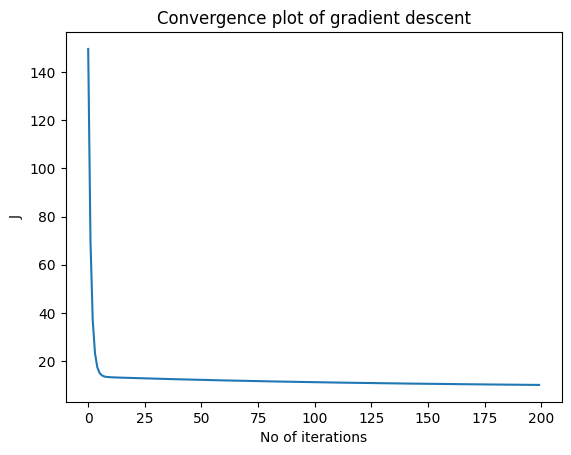

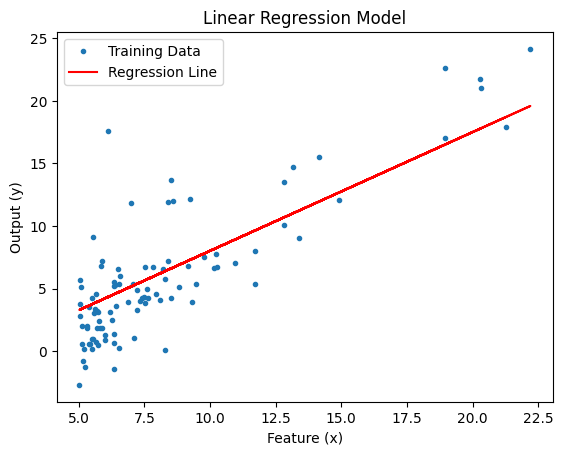

In [41]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

plt.plot(X,Y,'.')
plt.plot(X[:, 0], out.detach().numpy(), c = 'r')
plt.title('Linear Regression Model')
plt.xlabel('Feature (x)')
plt.ylabel('Output (y)')
plt.legend(['Training Data', 'Regression Line'])
plt.show()

## Multiclass Logistic Regression using Pytorch (softmax classification)

Reading assignment: Go through the following

1. https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
<br>
2. https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html
<br>
3. https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

Mini batch gradient descent:

 https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

In [42]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

# Load the classification dataset Iris
np_data = datasets.load_iris()

# convert np array to pytorch tensor
X = torch.from_numpy((np_data.data).astype('float32'))
Y = torch.from_numpy((np_data.target.astype('int64')))


# Logistic regression hypothesis using Pytorch
hypothesis = nn.Sequential(
    nn.Linear(X.shape[1], 3, bias=True), 
    nn.LogSoftmax(dim=1)) 
    
optimizer = optim.SGD(hypothesis.parameters(), lr = .01) # stochastic gradient descent with learning rate lr
Cost = nn.NLLLoss() # Negative log likelihood loss

J_history = []
for iterations in range(200):
    optimizer.zero_grad()
    # forward pass
    out = hypothesis(X)
    
    loss = Cost(out, Y)
    
    # backward pass
    loss.backward()
    
    # update paramters
    optimizer.step()
    
    J_history += [loss.item()]
    


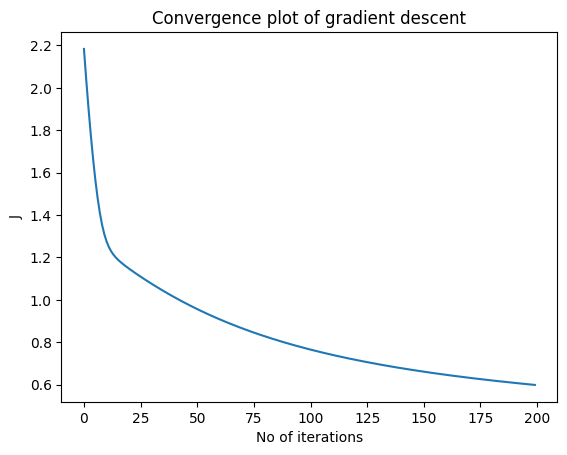

In [43]:
# plot the results
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of iterations')
plt.ylabel('J')
plt.show()

# Lab Task
## Logistic Regression on MNIST Handwritten Digit 
Apply logistic regression to mnist handwritten digits. Use the code in the previous cell as the starter code. There are 10 classes so the number of out_feature in nn.Linear will be 10. Set the in_features according to the dimension of vectorised image. Plot the convergence plot of gradiet descent.

Note: Do not use convolution or Deep neural network. Use vectorised image as input. Use multiclass logistic regression model as implemented in the previous cell. 

### 1. Load the MNIST data
Follow the guidelines here to download and use MNIST hand written digits dataset for the task
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html 

In [44]:
# use the following imports to download MNIST using Pytorch 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets

#todo:
# Define a transform to convert the data to tensor and normalize the pixel values
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the MNIST training set
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Download and load the MNIST test set
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

### 2. Visualize the MNIST data


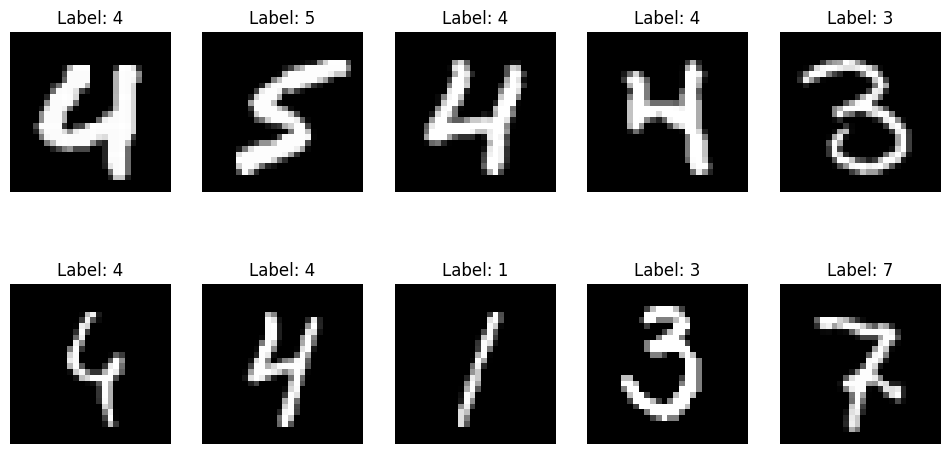

In [45]:
#todo
import matplotlib.pyplot as plt

# Load the MNIST dataset using the same code as before
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())

# Define a function to plot a grid of MNIST images
def plot_images(images, labels):
    fig, axs = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(2):
        for j in range(5):
            axs[i, j].imshow(images[i*5+j].squeeze(), cmap='gray')
            axs[i, j].set_title(f"Label: {labels[i*5+j]}")
            axs[i, j].axis('off')
    plt.show()

# Get a batch of 10 random images and labels from the training set
images, labels = next(iter(DataLoader(train_data, batch_size=10, shuffle=True)))

# Plot the images and labels using the `plot_images` function
plot_images(images, labels)

### 3.  Create a multiclass logistic regression (softmax) model and train

In [46]:
# Create softmax model. in_features = 28x28 and out_features = 10
# todo:
import torch.optim as optim

# Create softmax model. in_features = 28x28 and out_features = 10
model = nn.Sequential(
    nn.Linear(28*28, 10),
    nn.LogSoftmax(dim=1)
)

# Define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Train the model
epochs = 5
train_loss_history = []
train_acc_history = []
for epoch in range(epochs):
    running_loss = 0
    accuracy = 0
    for images, labels in train_loader:
        # Flatten the images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass through the model
        output = model(images)
        
        # Calculate the loss and perform backpropagation
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        # Keep track of the running loss and accuracy
        running_loss += loss.item()
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
        
    # Print the loss and accuracy for this epoch
    train_loss = running_loss/len(train_loader)
    train_acc = accuracy/len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}.. "
          f"Training loss: {train_loss:.3f}.. "
          f"Training accuracy: {train_acc:.3f}")
    
    # Store the loss and accuracy for this epoch
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

Epoch 1/5.. Training loss: 0.905.. Training accuracy: 0.795
Epoch 2/5.. Training loss: 0.514.. Training accuracy: 0.871
Epoch 3/5.. Training loss: 0.444.. Training accuracy: 0.882
Epoch 4/5.. Training loss: 0.411.. Training accuracy: 0.888
Epoch 5/5.. Training loss: 0.389.. Training accuracy: 0.893


### 4. Plot Convergence plot of gradient descent with respect to no of epochs

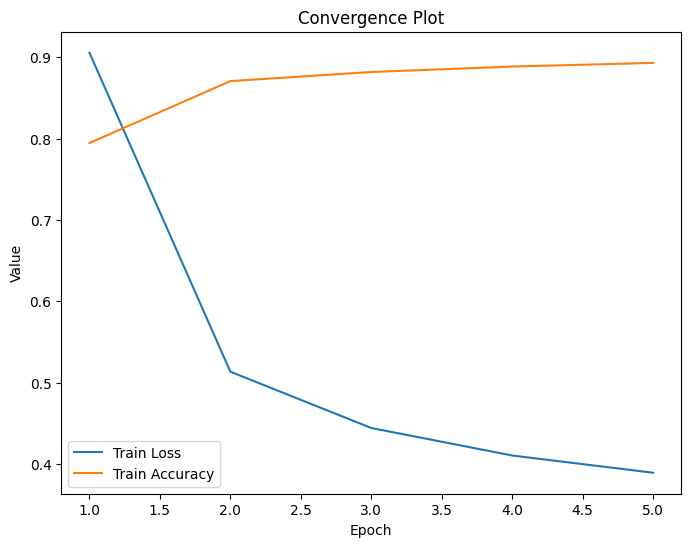

In [47]:
import matplotlib.pyplot as plt

# Plot the convergence plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs+1), train_loss_history, label='Train Loss')
plt.plot(range(1, epochs+1), train_acc_history, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Convergence Plot')
plt.legend()
plt.show()


### 5. Test on a batch of test images and display images with the predicted label

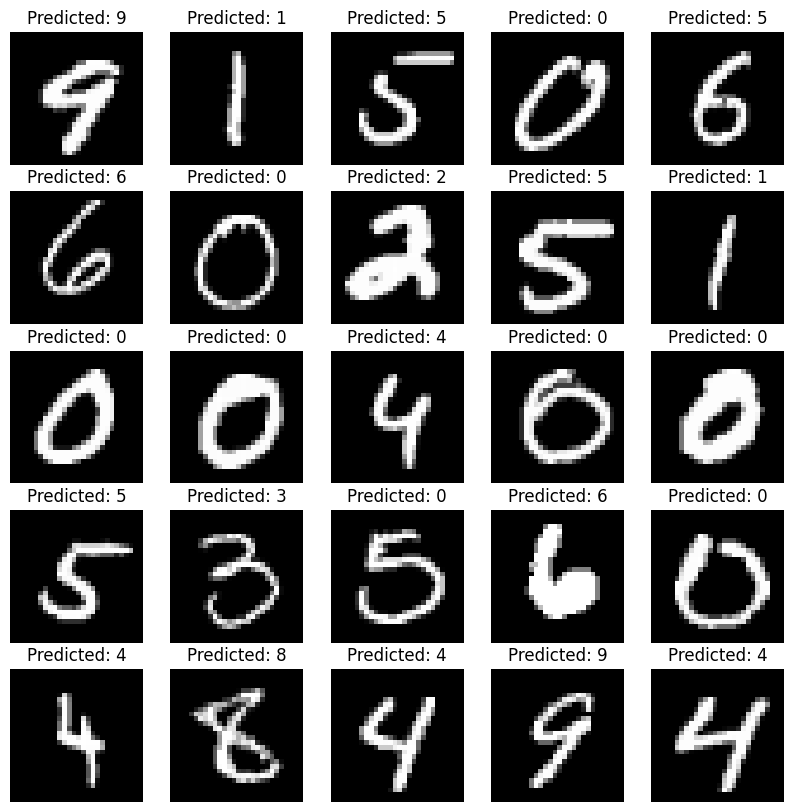

In [48]:
import matplotlib.pyplot as plt
# todo
# Set the model to evaluation mode
model.eval()

# Iterate through the test data loader
with torch.no_grad():
    for images, labels in test_loader:
        # Flatten the images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # Get predictions for the batch
        outputs = model(images)
        _, predicted = torch.max(outputs, dim=1)
        
        # Plot the images with their predicted labels
        plt.figure(figsize=(10,10))
        for i in range(min(25, len(images))):
            plt.subplot(5, 5, i+1)
            plt.imshow(images[i].reshape(28, 28), cmap='gray')
            plt.title(f"Predicted: {predicted[i]}")
            plt.axis('off')
        plt.show()
        break